In [2]:
## In this example, the data is in a matrix called
## data.matrix
## columns are individual samples (i.e. cells)
## rows are measurements taken for all the samples (i.e. genes)
## Just for the sake of the example, here's some made up data...
data.matrix <- matrix(nrow=100, ncol=10)
colnames(data.matrix) <- c(
  paste("wt", 1:5, sep=""),
  paste("ko", 1:5, sep=""))
rownames(data.matrix) <- paste("gene", 1:100, sep="")
for (i in 1:100) {
  wt.values <- rpois(5, lambda=sample(x=10:1000, size=1))
  ko.values <- rpois(5, lambda=sample(x=10:1000, size=1))
 
  data.matrix[i,] <- c(wt.values, ko.values)
}
head(data.matrix)
dim(data.matrix)
 
pca <- prcomp(t(data.matrix), scale=TRUE) 
 


,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,942,963,951,902,896,208,226,225,225,187
gene2,643,632,665,657,704,275,269,264,304,305
gene3,895,967,902,894,940,143,149,130,129,131
gene4,930,910,915,901,950,552,576,615,607,566
gene5,780,784,810,817,798,814,794,795,790,780
gene6,892,922,974,937,959,402,357,388,413,416


[1] 100  10

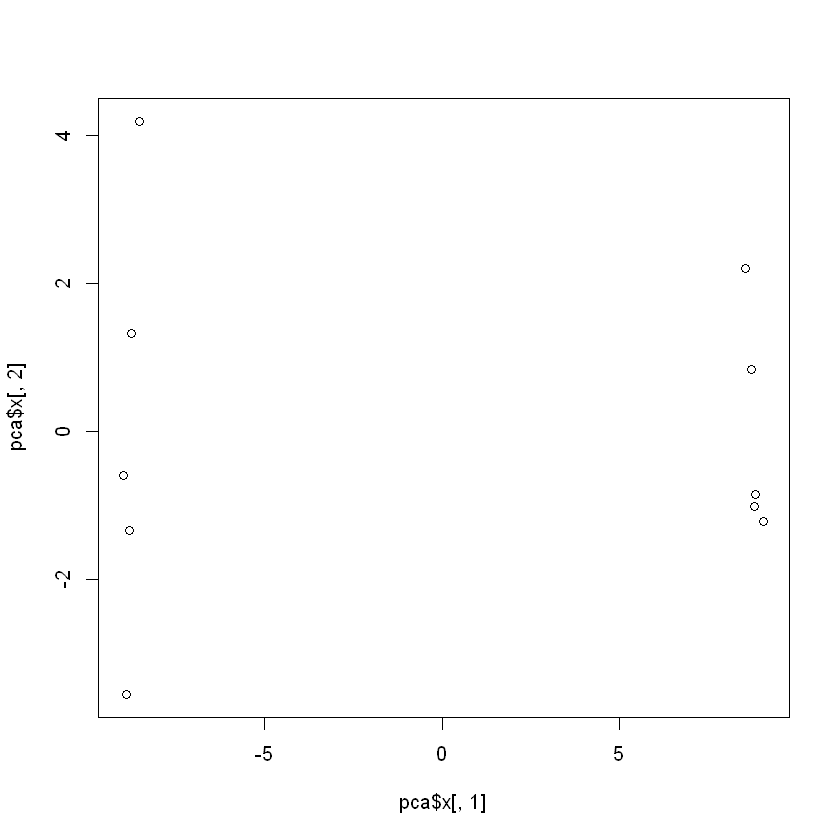

In [3]:
## plot pc1 and pc2
plot(pca$x[,1], pca$x[,2])
 


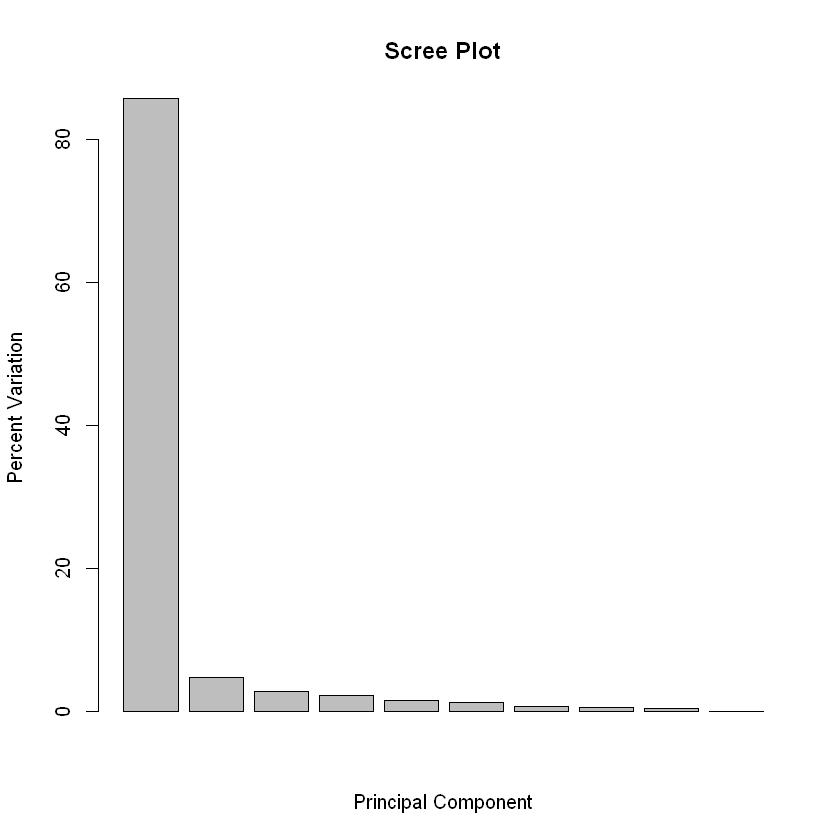

In [4]:
## make a scree plot
pca.var <- pca$sdev^2
pca.var.per <- round(pca.var/sum(pca.var)*100, 1)
 
barplot(pca.var.per, main="Scree Plot", xlab="Principal Component", ylab="Percent Variation")
 


,Sample,X,Y
wt1,wt1,-8.536859,4.1951078
wt2,wt2,-8.961259,-0.5878184
wt3,wt3,-8.808129,-1.3416264
wt4,wt4,-8.879679,-3.5564491
wt5,wt5,-8.736754,1.3274361
ko1,ko1,8.784655,-1.0160527
ko2,ko2,8.811275,-0.8524777
ko3,ko3,9.062492,-1.2208354
ko4,ko4,8.555178,2.2082823
ko5,ko5,8.709080,0.8444334


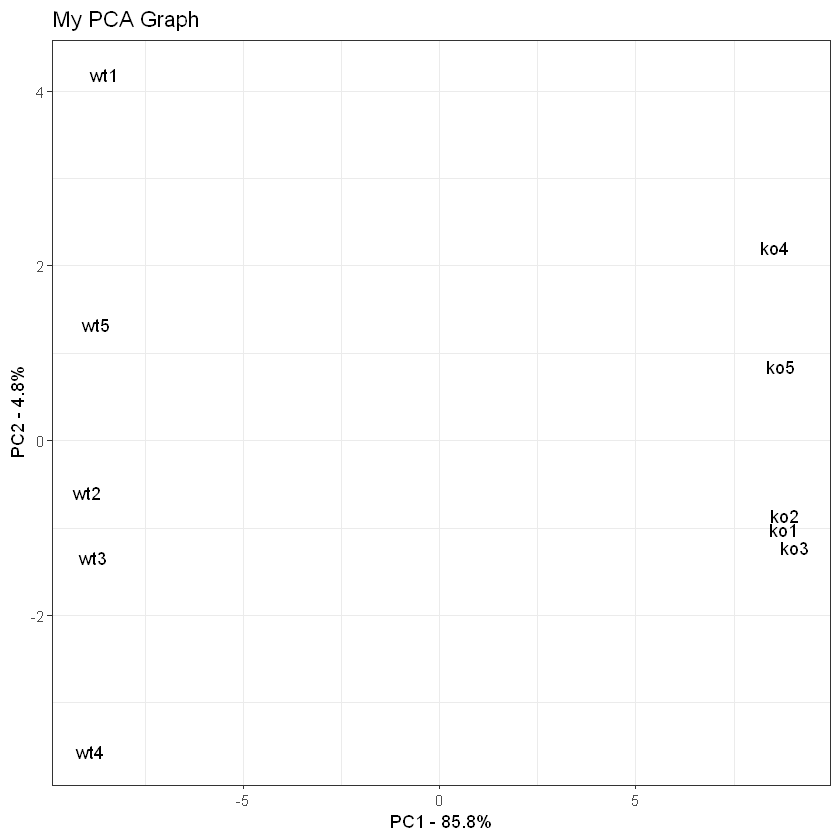

In [5]:
## now make a fancy looking plot that shows the PCs and the variation:
library(ggplot2)
 
pca.data <- data.frame(Sample=rownames(pca$x),
  X=pca$x[,1],
  Y=pca$x[,2])
pca.data
 
ggplot(data=pca.data, aes(x=X, y=Y, label=Sample)) +
  geom_text() +
  xlab(paste("PC1 - ", pca.var.per[1], "%", sep="")) +
  ylab(paste("PC2 - ", pca.var.per[2], "%", sep="")) +
  theme_bw() +
  ggtitle("My PCA Graph")
 

In [6]:

## get the name of the top 10 measurements (genes) that contribute
## most to pc1.
loading_scores <- pca$rotation[,1]
gene_scores <- abs(loading_scores) ## get the magnitudes
gene_score_ranked <- sort(gene_scores, decreasing=TRUE)
top_10_genes <- names(gene_score_ranked[1:10])
 
top_10_genes ## show the names of the top 10 genes
 
pca$rotation[top_10_genes,1] ## show the scores (and +/- sign)
 


[1] "gene49" "gene17" "gene12" "gene46" "gene8"  "gene56" "gene97" "gene45"
 [9] "gene20" "gene42"

gene49     gene17     gene12     gene46      gene8     gene56     gene97 
 0.1079542  0.1079169 -0.1078971 -0.1078963  0.1078865 -0.1078658  0.1078639 
    gene45     gene20     gene42 
-0.1078623 -0.1078575 -0.1078557

In [7]:
#######
##
## NOTE: Everything that follow is just bonus stuff.
## It simply demonstrates how to get the same
## results using "svd()" (Singular Value Decomposition) or using "eigen()"
## (Eigen Decomposition).
##
#######
 
############################################
##
## Now let's do the same thing with svd()
##
## svd() returns three things
## v = the "rotation" that prcomp() returns, this is a matrix of eigenvectors
##     in other words, a matrix of loading scores
## u = this is similar to the "x" that prcomp() returns. In other words,
##     sum(the rotation * the original data), but compressed to the unit vector
##     You can spread it out by multiplying by "d"
## d = this is similar to the "sdev" value that prcomp() returns (and thus
##     related to the eigen values), but not
##     scaled by sample size in an unbiased way (ie. 1/(n-1)).
##     For prcomp(), sdev = sqrt(var) = sqrt(ss(fit)/(n-1))
##     For svd(), d = sqrt(ss(fit))
##
############################################
 
svd.stuff <- svd(scale(t(data.matrix), center=TRUE))
 


In [8]:
## calculate the PCs
svd.data <- data.frame(Sample=colnames(data.matrix),
  X=(svd.stuff$u[,1] * svd.stuff$d[1]),
  Y=(svd.stuff$u[,2] * svd.stuff$d[2]))
svd.data
 


Sample,X,Y
wt1,-8.536859,4.1951078
wt2,-8.961259,-0.5878184
wt3,-8.808129,-1.3416264
wt4,-8.879679,-3.5564491
wt5,-8.736754,1.3274361
ko1,8.784655,-1.0160527
ko2,8.811275,-0.8524777
ko3,9.062492,-1.2208354
ko4,8.555178,2.2082823
ko5,8.709080,0.8444334


wt1,-8.536859,4.1951078
wt2,-8.961259,-0.5878184
wt3,-8.808129,-1.3416264
wt4,-8.879679,-3.5564491
wt5,-8.736754,1.3274361
ko1,8.784655,-1.0160527
ko2,8.811275,-0.8524777
ko3,9.062492,-1.2208354
ko4,8.555178,2.2082823
ko5,8.709080,0.8444334


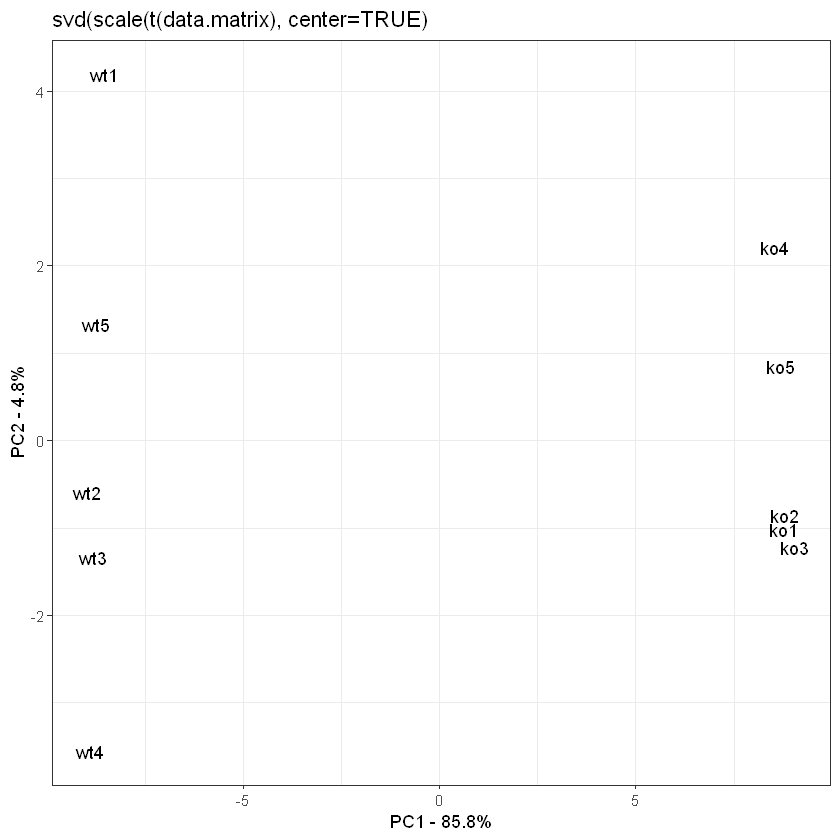

In [9]:
## alternatively, we could compute the PCs with the eigen vectors and the
## original data
svd.pcs <- t(t(svd.stuff$v) %*% t(scale(t(data.matrix), center=TRUE)))
svd.pcs[,1:2] ## the first to principal components
 
svd.df <- ncol(data.matrix) - 1
svd.var <- svd.stuff$d^2 / svd.df
svd.var.per <- round(svd.var/sum(svd.var)*100, 1)
 
ggplot(data=svd.data, aes(x=X, y=Y, label=Sample)) +
  geom_text() +
  xlab(paste("PC1 - ", svd.var.per[1], "%", sep="")) +
  ylab(paste("PC2 - ", svd.var.per[2], "%", sep="")) +
  theme_bw() +
  ggtitle("svd(scale(t(data.matrix), center=TRUE)")


In [10]:
 
############################################
##
## Now let's do the same thing with eigen()
##
## eigen() returns two things...
## vectors = eigen vectors (vectors of loading scores)
##           NOTE: pcs = sum(loading scores * values for sample)
## values = eigen values
##
############################################
cov.mat <- cov(scale(t(data.matrix), center=TRUE))
dim(cov.mat)
 


[1] 100 100

In [11]:
## since the covariance matrix is symmetric, we can tell eigen() to just
## work on the lower triangle with "symmetric=TRUE"
eigen.stuff <- eigen(cov.mat, symmetric=TRUE)
dim(eigen.stuff$vectors)
head(eigen.stuff$vectors[,1:2])
 


[1] 100 100

-0.10775938,0.004142284
-0.10732911,0.015074447
-0.10783212,0.000497616
-0.10705582,0.027382724
-0.01357418,-0.330384298
-0.10756905,-0.007238732


In [12]:
eigen.pcs <- t(t(eigen.stuff$vectors) %*% t(scale(t(data.matrix), center=TRUE)))
eigen.pcs[,1:2]
 


wt1,-8.536859,4.1951078
wt2,-8.961259,-0.5878184
wt3,-8.808129,-1.3416264
wt4,-8.879679,-3.5564491
wt5,-8.736754,1.3274361
ko1,8.784655,-1.0160527
ko2,8.811275,-0.8524777
ko3,9.062492,-1.2208354
ko4,8.555178,2.2082823
ko5,8.709080,0.8444334


In [13]:
eigen.data <- data.frame(Sample=rownames(eigen.pcs),
  X=(-1 * eigen.pcs[,1]), ## eigen() flips the X-axis in this case, so we flip it back
  Y=eigen.pcs[,2]) ## X axis will be PC1, Y axis will be PC2
eigen.data


,Sample,X,Y
wt1,wt1,8.536859,4.1951078
wt2,wt2,8.961259,-0.5878184
wt3,wt3,8.808129,-1.3416264
wt4,wt4,8.879679,-3.5564491
wt5,wt5,8.736754,1.3274361
ko1,ko1,-8.784655,-1.0160527
ko2,ko2,-8.811275,-0.8524777
ko3,ko3,-9.062492,-1.2208354
ko4,ko4,-8.555178,2.2082823
ko5,ko5,-8.709080,0.8444334


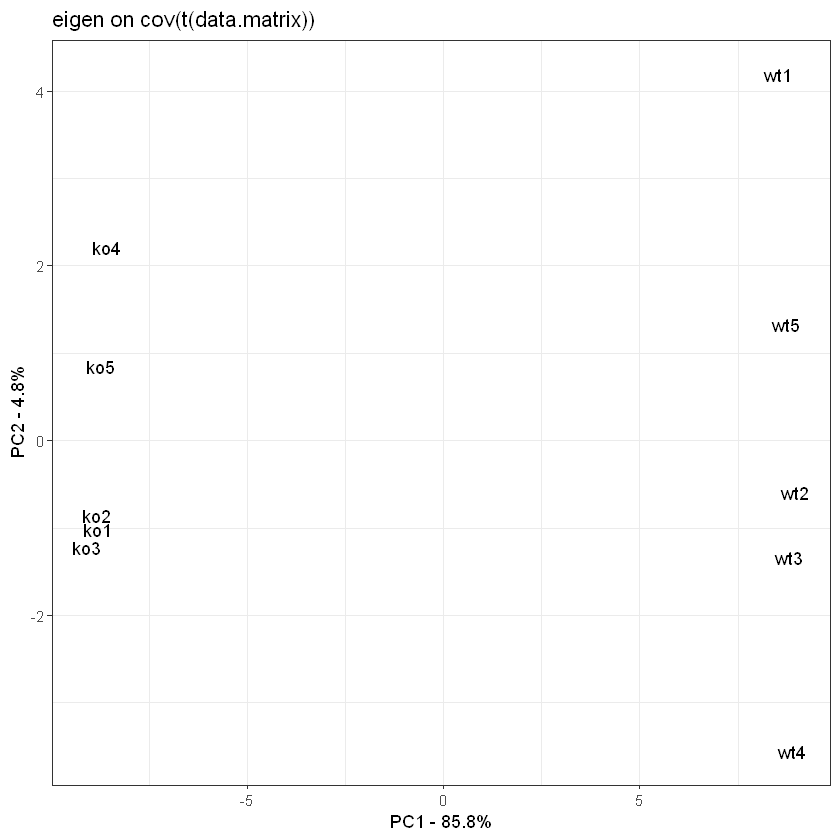

In [14]:
 
eigen.var.per <- round(eigen.stuff$values/sum(eigen.stuff$values)*100, 1)
 
ggplot(data=eigen.data, aes(x=X, y=Y, label=Sample)) +
  geom_text() +
  xlab(paste("PC1 - ", eigen.var.per[1], "%", sep="")) +
  ylab(paste("PC2 - ", eigen.var.per[2], "%", sep="")) +
  theme_bw() +
  ggtitle("eigen on cov(t(data.matrix))")